# Sorular

 - Süreniz 40 dkdır.

In [47]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

# To convert Julian date to standard date
import datetime
from datetime import datetime
from datetime import time

import warnings
warnings.filterwarnings('ignore')

X1 = np.random.normal(loc= -4, size= (100,2))
X2 = np.random.normal(loc= 4, size= (100,2))
toy_data = np.concatenate((X1,X2))


X1 = np.random.normal(loc= (-4,4), size= (100,2))
X2 = np.random.normal(loc= (4, -4), size= (100,2))
toy_data2 = np.concatenate((X1,X2))


# Soru: Basit Makine Öğrenme Algoritmaları ile bu veriyi inceleyin.

 - En az iki ML algoritmasi deneyin

In [48]:
X = np.concatenate((toy_data, toy_data2))
y = np.concatenate((np.zeros((200,1)),np.ones((200,1))))
X.shape, y.shape

((400, 2), (400, 1))

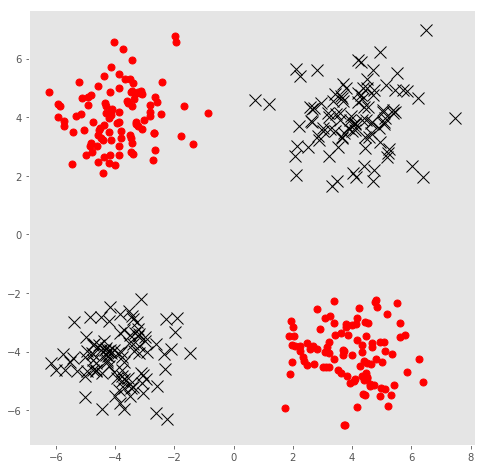

In [49]:
fig, ax = plt.subplots();fig.set_size_inches(8,8); 
plt.plot(X[:200,0], X[:200,1],'kx', markersize=12)
plt.plot(X[200:,0], X[200:,1],'ro', markersize=7)
plt.grid(); plt.show();

# Helper

In [50]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    fig, ax = plt.subplots();fig.set_size_inches(8,8); 
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('black','red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    plt.plot(X[:200,0], X[:200,1],'kx', markersize=12)
    plt.plot(X[200:,0], X[200:,1],'ro', markersize=7)

In [57]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
# Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Apply ML
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Learn best parameters
knn.fit(X_train, y_train)
# Prediction
y_pred = knn.predict(X_test)
# Evaluation
accuracy_score(y_test, y_pred)

1.0

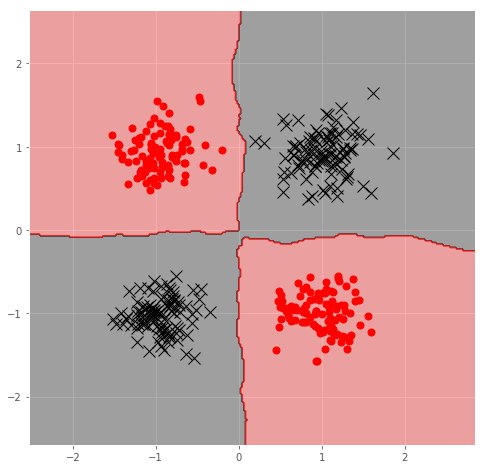

In [58]:
plot_decision_regions(scaler.transform(X), y, classifier=knn)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.42


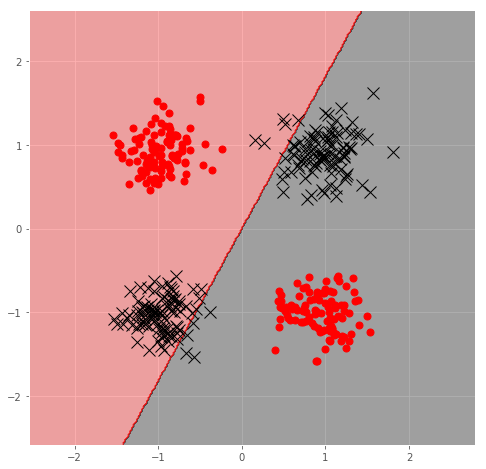

In [60]:
plot_decision_regions(scaler.transform(X), y, classifier=model)


In [72]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.97


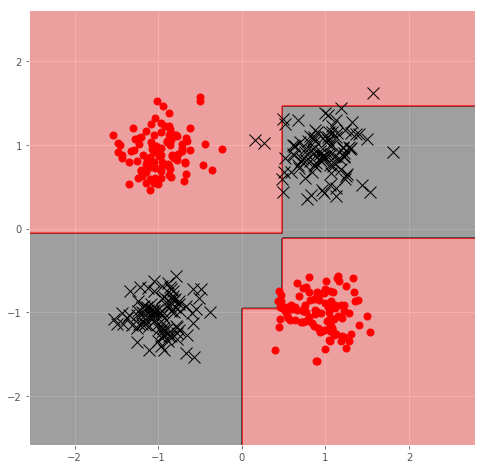

In [73]:
plot_decision_regions(scaler.transform(X), y, classifier=tree)

In [62]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(4), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33,stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


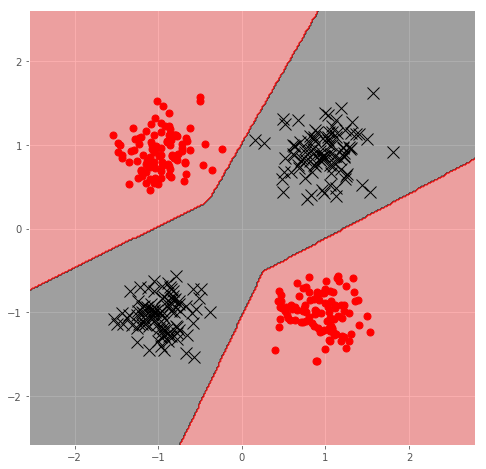

In [63]:
plot_decision_regions(scaler.transform(X), y, classifier=clf)

# Soru: Anomali Tespiti

In [13]:
from sklearn.ensemble import IsolationForest
X1 = np.random.normal(loc= -2, size= (100,2))
X2 = np.random.normal(loc= 4, size= (100,2))
X3 = np.random.normal(loc= -5, size= (100,2))
A = np.array([[5,-5]])
toy_data = np.concatenate((X3, A, X1,X2))

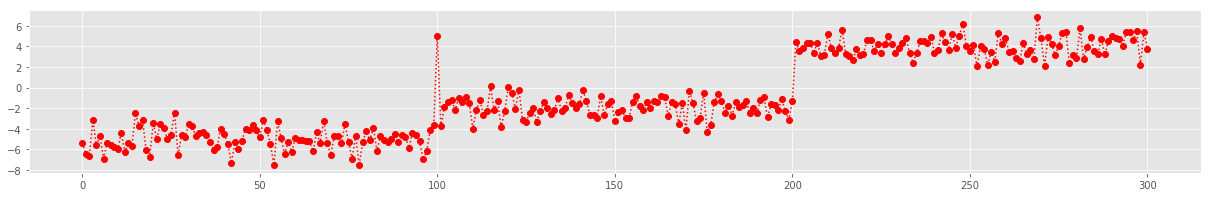

In [14]:
messages = toy_data[:,0]
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');

In [15]:
messages = messages.reshape(-1,1)
messages.shape

(301, 1)

In [16]:
t = np.array(list(range(301))).reshape(-1,1)
t.shape

(301, 1)

### 1.Anomaly Detection Based on Regressor

In [17]:
from sklearn.svm import SVR     
model = SVR(kernel='rbf', C=1e3, gamma=.1)
y_rbf = model.fit(t, messages).predict(t)

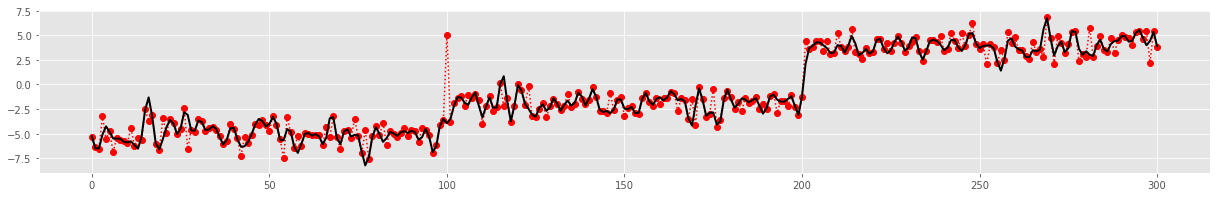

In [18]:
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');
plt.plot(y_rbf, 'k', lw = 2)

Text(0.5,1,'Difference From the Regressor')

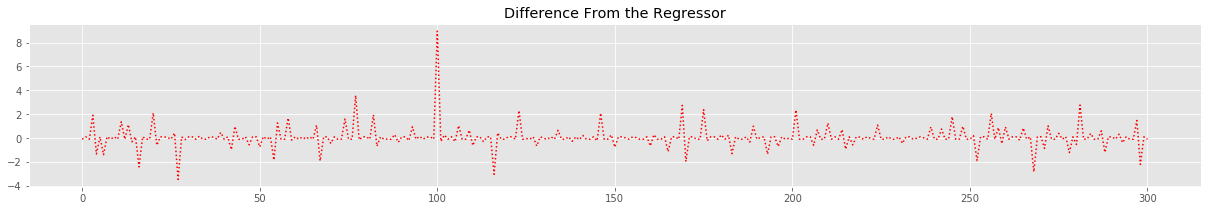

In [19]:
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages.reshape(y_rbf.shape)-y_rbf, ':r');
plt.title('Difference From the Regressor')

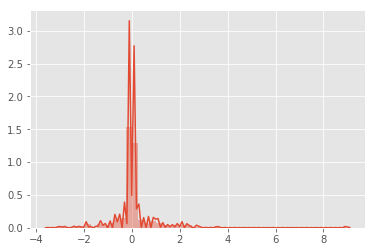

In [20]:
data = messages.reshape(y_rbf.shape)-y_rbf
sns.distplot(data)

In [21]:
m,s = data.mean(), data.std()
anomaly_days = np.where(np.abs(data-m) > 3 * s)
print(anomaly_days)

(array([ 27,  77, 100, 116, 268]),)


In [22]:
m,s = data.mean(), data.std()
anomaly_days = np.where(np.abs(data-m) > 4 * s)
print(anomaly_days)

(array([100]),)


### 2. Anomaly Detection Based on Moving Average

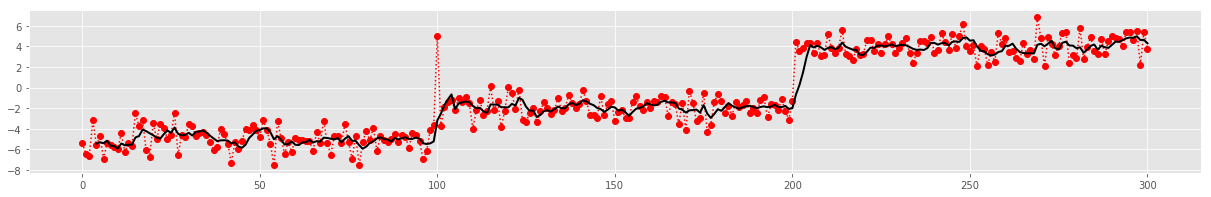

In [23]:
messages = pd.DataFrame(toy_data[:,0])
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');
plt.plot(messages.rolling(window=5).mean(), 'k', lw = 2)

Text(0.5,1,'Difference From the Local Mean')

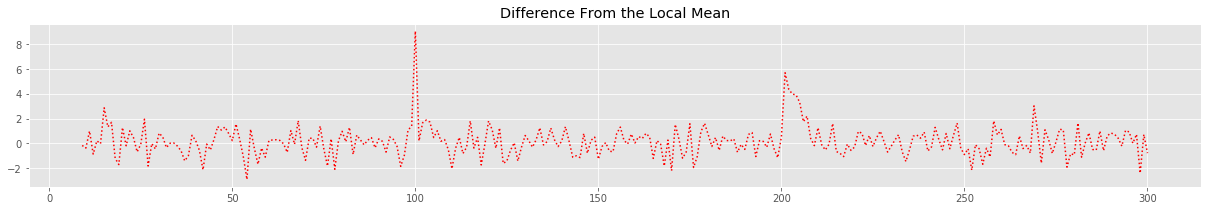

In [24]:
fig = plt.figure(); fig.set_size_inches(21,3); 
de_mean_messages = messages - messages.rolling(window=10).mean()
plt.plot(de_mean_messages, ':r')
plt.title('Difference From the Local Mean')

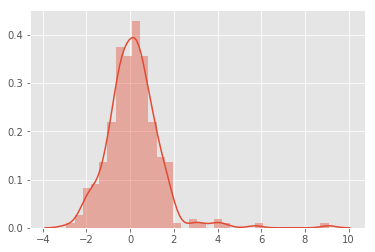

In [25]:
sns.distplot(de_mean_messages[9:])

In [26]:
m,s = de_mean_messages.mean(), de_mean_messages.std()
anomaly_days = np.where(np.abs(de_mean_messages-m) > 3 * s)
print(anomaly_days)

(array([100, 201, 202, 203, 204]), array([0, 0, 0, 0, 0]))


### 3. Anomaly Detection Based on Isolation Forest

In [27]:
messages[1] = list(range(len(messages)))
messages = messages.iloc[:,[1,0]]
messages.head()

,1,0
0,0,-5.385920
1,1,-6.407872
2,2,-6.605419
3,3,-3.196159
4,4,-5.605212


In [33]:
X = messages.values

In [40]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination = 0.01)
isolation_forest.fit(X)

outlier = isolation_forest.predict(X)
outliers = np.where(outlier==-1)[0]

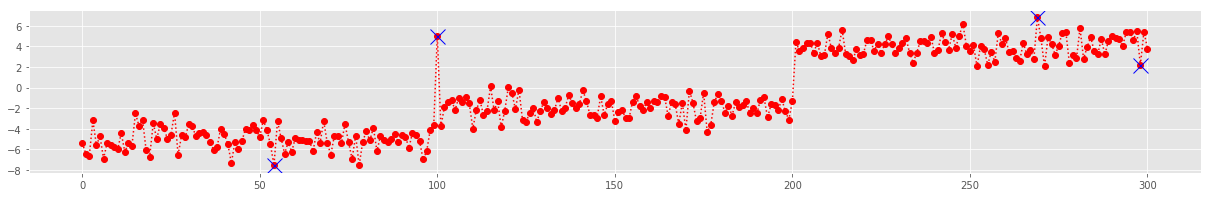

In [41]:
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(X[:,1], ':ro');
plt.plot(outliers, X[outliers, 1],'bx', markersize = 15);plt.show()

In [43]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination = 0.001)
isolation_forest.fit(X)

outlier = isolation_forest.predict(X)
outliers = np.where(outlier==-1)[0]

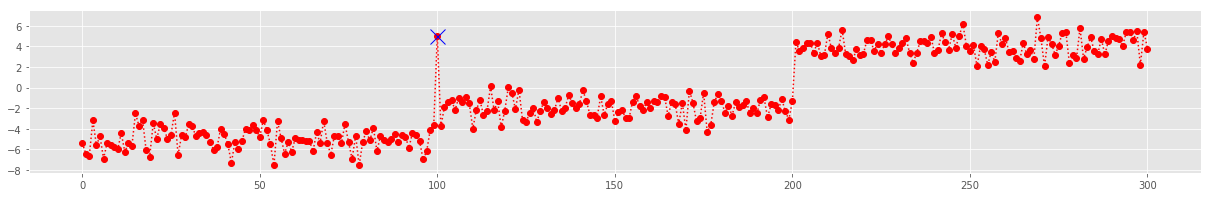

In [44]:
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(X[:,1], ':ro');
plt.plot(outliers, X[outliers, 1],'bx', markersize = 15);plt.show()